In [1]:
from collections import defaultdict
import xml.etree.ElementTree as ET

annotations = defaultdict(lambda: defaultdict(list))

tree = ET.parse('annotations.xml')
root = tree.getroot()

for track in root.findall('track'):
    frame = int(track[0].attrib['frame'])
    
    label = track.attrib['label']

    if label in ('Car', 'Pedestrian'):
        xtl = float(track[0].attrib['xtl'])
        ytl = float(track[0].attrib['ytl'])
        xbr = float(track[0].attrib['xbr'])
        ybr = float(track[0].attrib['ybr'])

        annotations[frame]['box'].append([label, xtl, ytl, xbr, ybr])
    elif 'Lane' in label:        
        points = track[0].attrib['points']
        points = [[float(n) for n in xy.split(',')] for xy in points.split(';')]
        annotations[frame]['lane'].append([label, points])

In [2]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

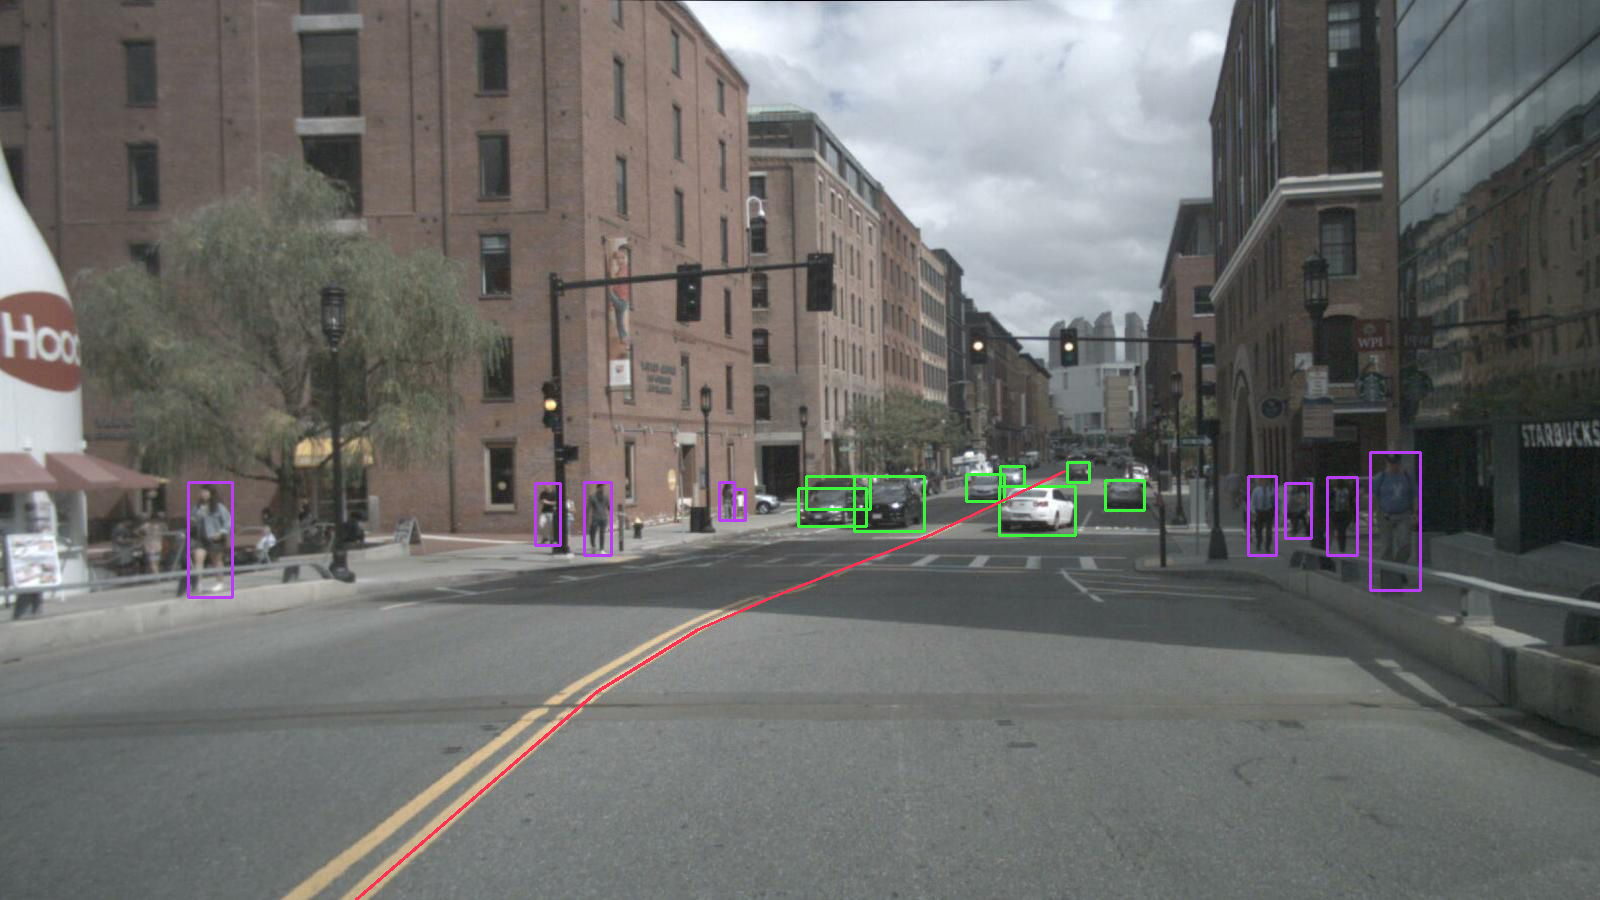

In [3]:
from PIL import Image
import cv2
import numpy as np

frame = 0
image = cv2.imread('frame{}.jpg'.format(frame))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

COLORS = {
    'Car': hex_to_rgb('#3df53d'),
    'Pedestrian': hex_to_rgb('#b83df5'),
    'CenterLane': hex_to_rgb('#fa3253'),
}

### Draw boxes
for box in annotations[frame]['box']:
    cls = box[0]
    color = COLORS[cls]
    x1 = int(box[1])
    y1 = int(box[2])
    x2 = int(box[3])
    y2 = int(box[4])
    image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2) 

### Draw lanes
for lane in annotations[frame]['lane']:
    cls = lane[0]
    color = COLORS[cls]
    points = np.array(lane[1]).astype(np.int32).reshape((-1, 1, 2))
    image = cv2.polylines(image, [points], False, color, 2)    

Image.fromarray(image)
